# Imports

In [53]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import folium
import pycountry
from shapely import wkt
import networkx as nx
import dill
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import ast
import utils_pre_processing as upp
from utils_pre_processing import split_col_to_and_from
from geopy.geocoders import Nominatim
import pycountry
# Show all columns when using .head()
pd.set_option('display.max_columns', None)

# Reading data

In [54]:
iggielgn_borderpoints = pd.read_csv('IGGIELGN/IGGIELGN_BorderPoints.csv', delimiter=';')
iggielgn_compressors = pd.read_csv('IGGIELGN/IGGIELGN_Compressors.csv', delimiter=';')
iggielgn_consumers = pd.read_csv('IGGIELGN/IGGIELGN_Consumers.csv', delimiter=';')
iggielgn_lngs = pd.read_csv('IGGIELGN/IGGIELGN_LNGs.csv', delimiter=';')
iggielgn_nodes = pd.read_csv('IGGIELGN/IGGIELGN_Nodes.csv', delimiter=';')
iggielgn_pipesegments = pd.read_csv('IGGIELGN/IGGIELGN_PipeSegments.csv', delimiter=';')
iggielgn_productions = pd.read_csv('IGGIELGN/IGGIELGN_Productions.csv', delimiter=';')
iggielgn_storages = pd.read_csv('IGGIELGN/IGGIELGN_Storages.csv', delimiter=';')

# Pre-processing columns

## Pipe Segments

In [55]:
# Expanding param, uncertainty and method columns
iggielgn_pipesegments = upp.split_column_to_multiple(iggielgn_pipesegments, 'param')
iggielgn_pipesegments = upp.split_column_to_multiple(iggielgn_pipesegments, 'uncertainty', 'uncertainty_')
iggielgn_pipesegments = upp.split_column_to_multiple(iggielgn_pipesegments, 'method', 'method_')

# Splitting node_id, country_code, lat and long columns
iggielgn_pipesegments = upp.split_col_to_and_from(iggielgn_pipesegments, 'node_id', 'str')
iggielgn_pipesegments = upp.split_col_to_and_from(iggielgn_pipesegments, 'country_code', 'str')
iggielgn_pipesegments = upp.split_coords(iggielgn_pipesegments, 'lat')
iggielgn_pipesegments = upp.split_coords(iggielgn_pipesegments, 'long')

## Border Points

In [56]:
# Convert values in the node_id col of iggielgn_borderpoints from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_borderpoints['node_id'] = iggielgn_borderpoints['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Rename the country_code column to country_code_node
iggielgn_borderpoints.rename(columns={'country_code': 'country_code_node'}, inplace=True)

# Expanding param, uncertainty and method columns
iggielgn_borderpoints = upp.split_column_to_multiple(iggielgn_borderpoints, 'param')
iggielgn_borderpoints = upp.split_column_to_multiple(iggielgn_borderpoints, 'uncertainty', 'uncertainty_')
iggielgn_borderpoints = upp.split_column_to_multiple(iggielgn_borderpoints, 'method', 'method_')

## Compressors

In [57]:
# Convert values in the node_id col of iggielgn_compressors from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_compressors['node_id'] = iggielgn_compressors['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Expanding param, uncertainty and method columns
iggielgn_compressors = upp.split_column_to_multiple(iggielgn_compressors, 'param')
iggielgn_compressors = upp.split_column_to_multiple(iggielgn_compressors, 'uncertainty', 'uncertainty_')
iggielgn_compressors = upp.split_column_to_multiple(iggielgn_compressors, 'method', 'method_')

## LNGs

In [58]:
# Convert values in the node_id col of iggielgn_lngs from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_lngs['node_id'] = iggielgn_lngs['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Expanding param, uncertainty and method columns
iggielgn_lngs = upp.split_column_to_multiple(iggielgn_lngs, 'param')
iggielgn_lngs = upp.split_column_to_multiple(iggielgn_lngs, 'uncertainty', 'uncertainty_')
iggielgn_lngs = upp.split_column_to_multiple(iggielgn_lngs, 'method', 'method_')

## Consumers

In [59]:
# Convert values in the node_id col of iggielgn_consumers from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_consumers['node_id'] = iggielgn_consumers['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Expanding param, uncertainty and method columns
iggielgn_consumers = upp.split_column_to_multiple(iggielgn_consumers, 'param')
iggielgn_consumers = upp.split_column_to_multiple(iggielgn_consumers, 'uncertainty', 'uncertainty_')
iggielgn_consumers = upp.split_column_to_multiple(iggielgn_consumers, 'method', 'method_')

## Productions

In [60]:
# Convert values in the node_id col of iggielgn_productions from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_productions['node_id'] = iggielgn_productions['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Expanding param, uncertainty and method columns
iggielgn_productions = upp.split_column_to_multiple(iggielgn_productions, 'param')
iggielgn_productions = upp.split_column_to_multiple(iggielgn_productions, 'uncertainty', 'uncertainty_')
iggielgn_productions = upp.split_column_to_multiple(iggielgn_productions, 'method', 'method_')

## Storages

In [61]:
# Convert values in the node_id col of iggielgn_storages from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_storages['node_id'] = iggielgn_storages['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Expanding param, uncertainty and method columns
iggielgn_storages = upp.split_column_to_multiple(iggielgn_storages, 'param')
iggielgn_storages = upp.split_column_to_multiple(iggielgn_storages, 'uncertainty', 'uncertainty_')
iggielgn_storages = upp.split_column_to_multiple(iggielgn_storages, 'method', 'method_')

## Nodes

In [62]:
# Expanding param, uncertainty and method columns
iggielgn_nodes = upp.split_column_to_multiple(iggielgn_nodes, 'param')
iggielgn_nodes = upp.split_column_to_multiple(iggielgn_nodes, 'uncertainty', 'uncertainty_')
iggielgn_nodes = upp.split_column_to_multiple(iggielgn_nodes, 'method', 'method_')

# Add a "type" column to iggielgn_nodes, a list of the type of the node
iggielgn_nodes['type'] = ''

for row in iggielgn_nodes.itertuples():
    iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] + 'node'
    if row.id in iggielgn_consumers['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] + ', consumer'
    if row.id in iggielgn_productions['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] + ', production'
    if row.id in iggielgn_storages['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] + ', storage'
    if row.id in iggielgn_compressors['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] + ', compressor'
    if row.id in iggielgn_lngs['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] + ', lng'
    if row.id in iggielgn_borderpoints['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] + ', borderpoint'

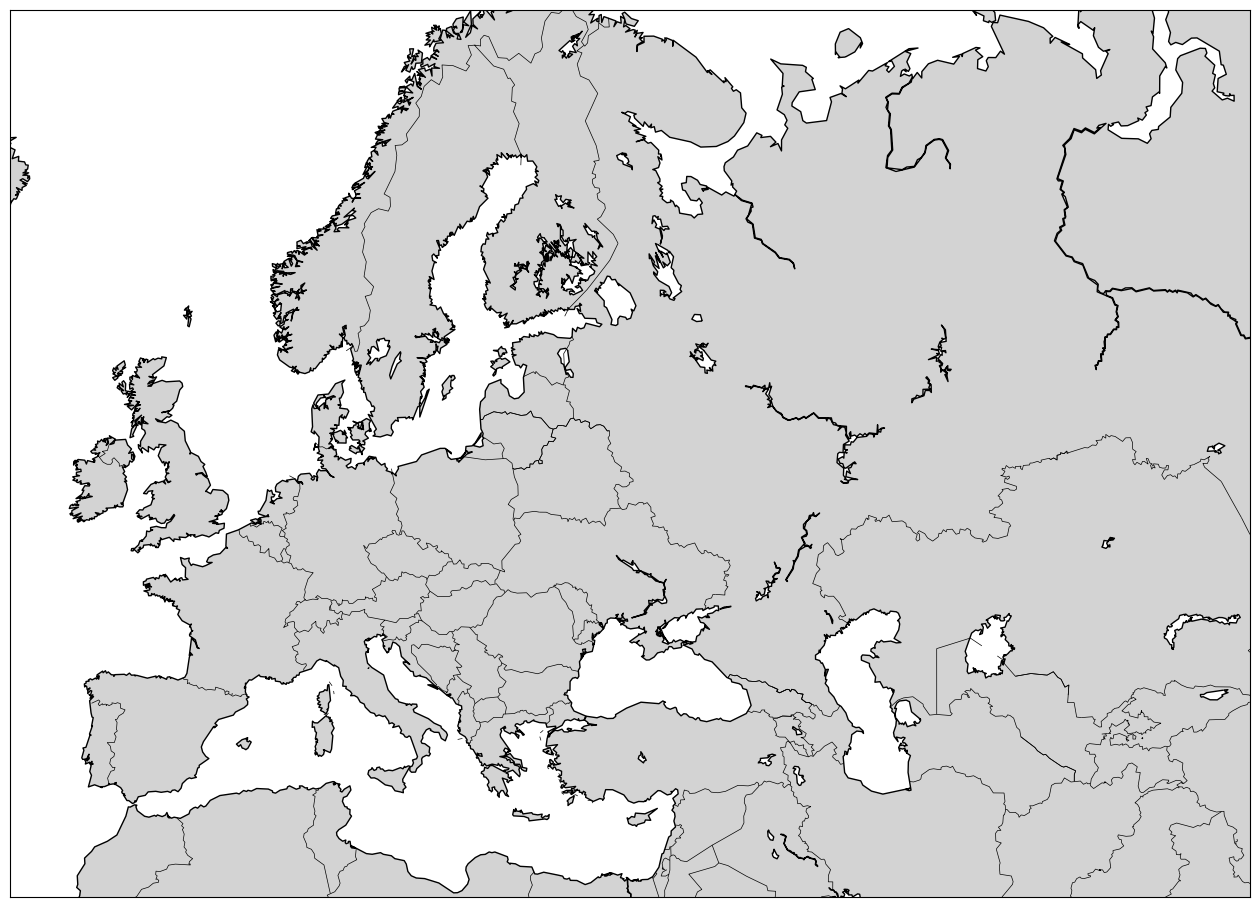

In [79]:
# Plot the nodes that have country_code = 'XX' on a map

fig, ax = plt.subplots(figsize=(16, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the nodes
for row in iggielgn_nodes[iggielgn_nodes['country_code'] == 'LY'].itertuples():
    x, y = m(row.long, row.lat)
    m.plot(x, y, 'ro', markersize=5)

plt.show()

# Plotting the nodes

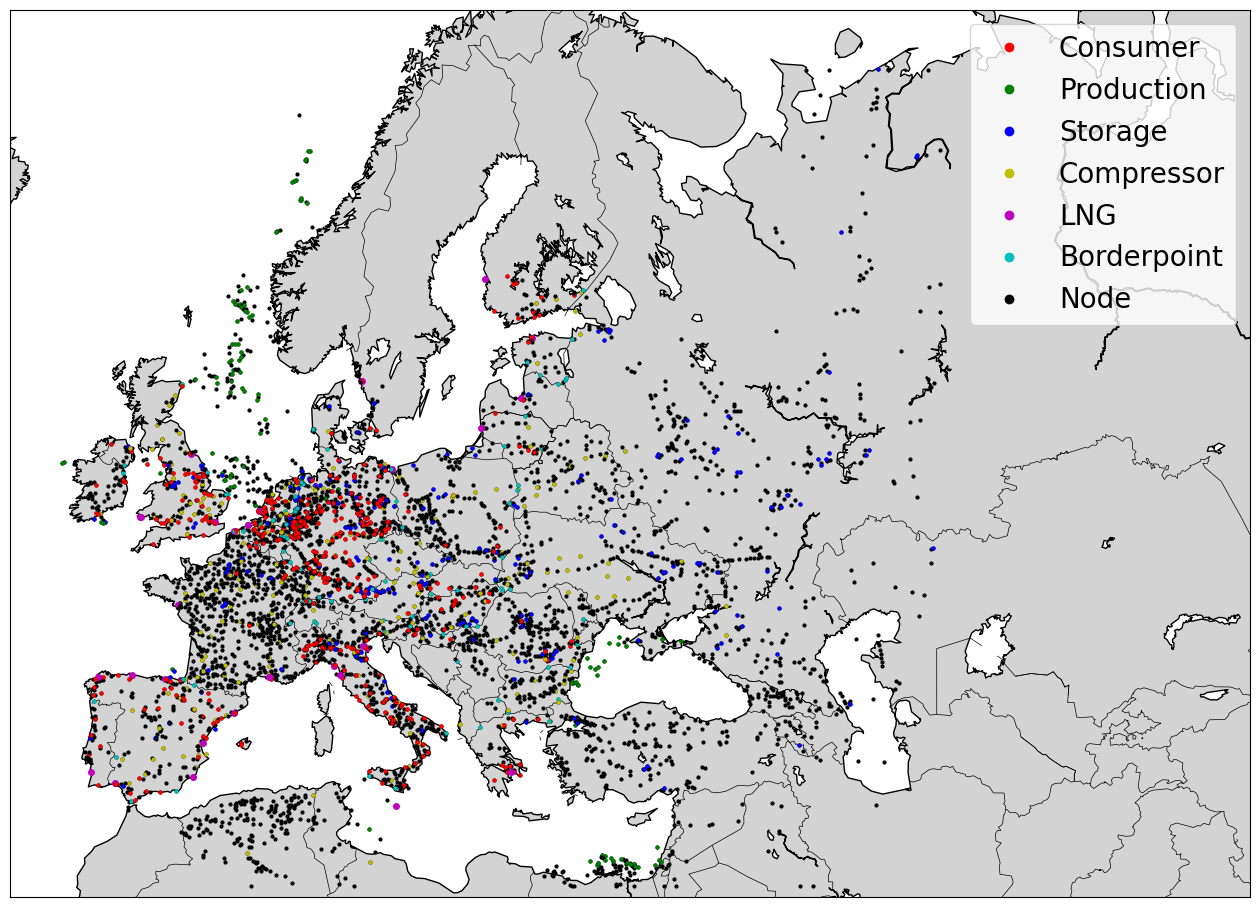

In [64]:
# Plot the nodes on the map
fig, ax = plt.subplots(figsize=(16, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the nodes, and color based on the type
for row in iggielgn_nodes.itertuples():
    x, y = m(row.long, row.lat)
    # If row.type contains "consumer", color red
    if 'node' in row.type:
        m.plot(x, y, 'ko', markersize=2)
    if 'consumer' in row.type:
        m.plot(x, y, 'ro', markersize=2)
    if 'production' in row.type:
        m.plot(x, y, 'go', markersize=2)
    if 'storage' in row.type:
        m.plot(x, y, 'bo', markersize=2)
    if 'compressor' in row.type:
        m.plot(x, y, 'yo', markersize=2)
    if 'lng' in row.type:
        m.plot(x, y, 'mo', markersize=4)
    if 'borderpoint' in row.type:
        m.plot(x, y, 'co', markersize=2)


# Add legend
plt.plot([], [], 'ro', label='Consumer')
plt.plot([], [], 'go', label='Production')
plt.plot([], [], 'bo', label='Storage')
plt.plot([], [], 'yo', label='Compressor')
plt.plot([], [], 'mo', label='LNG')
plt.plot([], [], 'co', label='Borderpoint')
plt.plot([], [], 'ko', label='Node')
plt.legend(loc='upper right', fontsize=20)

plt.show()

# Creating the NetworkX graph

In [65]:
# Create a networkx graph using the nodes_df as nodes and the pipe_segments_df as edges
G_multi_directed = nx.MultiDiGraph()

# Add nodes to the graph
for index, row in iggielgn_nodes.iterrows():
    # Get the columns of the row, and add the columns as attributes to the node
    attributes = dict(row)
    G_multi_directed.add_node(row['id'], **attributes)

# Add edges to the graph
for index, row in iggielgn_pipesegments.iterrows():
    # Get the columns of the row, and add the columns as attributes to the edge
    attributes = dict(row)
    G_multi_directed.add_edge(row['from_node_id'], row['to_node_id'], **attributes)

# Iterate over the edges once more: if the is_bothDirection is 1.0, add the edge in the opposite direction
for index, row in iggielgn_pipesegments.iterrows():
    if row['is_bothDirection'] == 1.0:
        G_multi_directed.add_edge(row['to_node_id'], row['from_node_id'], **dict(row))

# Defining sinks and sources

In [80]:
# Give the nodes a new attribute, 'flow_type', which can be either 'sink', 'source' or 'transit'

# First, set all nodes to transit
for node in G_multi_directed.nodes():
    G_multi_directed.nodes[node]['flow_type'] = 'transit'

# Then, set the nodes that are consumers to sink
for node in iggielgn_consumers['node_id']:
    G_multi_directed.nodes[node]['flow_type'] = 'sink'

# Then, set the nodes that are productions to source
for node in iggielgn_productions['node_id']:
    G_multi_directed.nodes[node]['flow_type'] = 'source'

# Then, set the nodes that are in Norway with in-degree 0 to source
for node in G_multi_directed.nodes():
    if G_multi_directed.nodes[node]['country_code'] == 'NO' and G_multi_directed.in_degree(node) == 0:
        G_multi_directed.nodes[node]['flow_type'] = 'source'

# Then, set the nodes that are in Russia with in-degree 0 to source
for node in G_multi_directed.nodes():
    if G_multi_directed.nodes[node]['country_code'] == 'RU' and G_multi_directed.in_degree(node) == 0:
        G_multi_directed.nodes[node]['flow_type'] = 'source'

# Then, set the nodes that are in Algeria with in-degree 0 to source
for node in G_multi_directed.nodes():
    if G_multi_directed.nodes[node]['country_code'] == 'DZ' and G_multi_directed.in_degree(node) == 0:
        G_multi_directed.nodes[node]['flow_type'] = 'source'

# Then, set the nodes that are in Libya with in-degree 0 to source
for node in G_multi_directed.nodes():
    if G_multi_directed.nodes[node]['country_code'] == 'LY' and G_multi_directed.in_degree(node) == 0:
        G_multi_directed.nodes[node]['flow_type'] = 'source'

# Then, set the nodes with country_code XX and in-degree 0 to source
for node in G_multi_directed.nodes():
    if G_multi_directed.nodes[node]['country_code'] == 'XX' and G_multi_directed.in_degree(node) == 0:
        G_multi_directed.nodes[node]['flow_type'] = 'source'

# Set the nodes with type 'lng' to source
for node in G_multi_directed.nodes():
    if 'lng' in G_multi_directed.nodes[node]['type']:
        G_multi_directed.nodes[node]['flow_type'] = 'source'

# Set the nodes with type 'storage' to sink
for node in G_multi_directed.nodes():
    if 'storage' in G_multi_directed.nodes[node]['type']:
        G_multi_directed.nodes[node]['flow_type'] = 'sink'

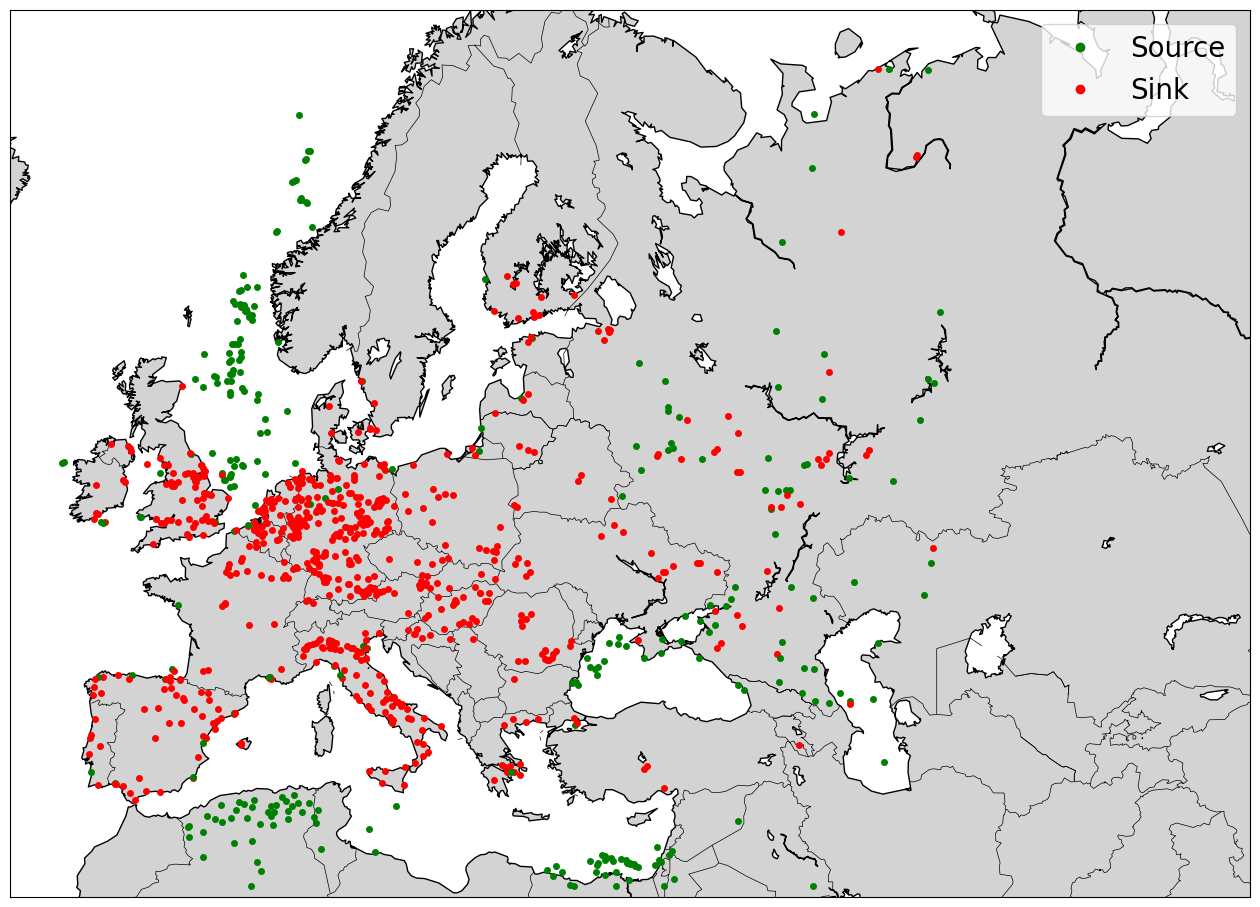

In [83]:
# Plot the nodes of the network, coloring each node basedd on its 'flow_type' attribute
fig, ax = plt.subplots(figsize=(16, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the nodes, and color based on the flow_type
for node in G_multi_directed.nodes(data=True):
    x, y = m(node[1]['long'], node[1]['lat'])
    if node[1]['flow_type'] == 'source':
        m.plot(x, y, 'go', markersize=4)
    if node[1]['flow_type'] == 'sink':
        m.plot(x, y, 'ro', markersize=4)
    # if node[1]['flow_type'] == 'transit':
    #     m.plot(x, y, 'bo', markersize=4)

# Add legend
plt.plot([], [], 'go', label='Source')
plt.plot([], [], 'ro', label='Sink')
# plt.plot([], [], 'bo', label='Transit')
plt.legend(loc='upper right', fontsize=20)

plt.show()


In [68]:
# Create a simple directed graph, a multi undirected graph, and a simple undirected graph from the directed multigraph

# Aggregating the edges with the same from_node_id and to_node_id, and aggregating the capacity attribute of the edges
G_simple_directed = nx.DiGraph()
for from_node in G_multi_directed.nodes:
    for to_node in G_multi_directed.nodes:
        if G_multi_directed.has_edge(from_node, to_node):
            edge_attrs = G_multi_directed[from_node][to_node][0]
            if G_simple_directed.has_edge(from_node, to_node):
                G_simple_directed[from_node][to_node]['max_cap_M_m3_per_d'] += edge_attrs['max_cap_M_m3_per_d']
            else:
                G_simple_directed.add_node(from_node, **G_multi_directed.nodes[from_node])
                G_simple_directed.add_node(to_node, **G_multi_directed.nodes[to_node])
                G_simple_directed.add_edge(from_node, to_node, name=edge_attrs['name'], max_cap_M_m3_per_d=edge_attrs['max_cap_M_m3_per_d'], length_km=edge_attrs['length_km'], diameter_mm=edge_attrs['diameter_mm'], is_H_gas=edge_attrs['is_H_gas'], is_bothDirection=edge_attrs['is_bothDirection'], start_year=edge_attrs['start_year'], end_year=edge_attrs['end_year'], from_country_code=edge_attrs['from_country_code'], to_country_code=edge_attrs['to_country_code'])

G_multi_undirected = nx.MultiGraph(G_multi_directed)
G_simple_undirected = nx.Graph(G_multi_directed)

In [69]:
# Saving the multi di-graph to a pickle file
with open('graph_objects/G_multi_directed_iggielgn.pickle', 'wb') as file:
    dill.dump(G_multi_directed, file)

# Saving the simple di-graph to a pickle file
with open('graph_objects/G_simple_directed_iggielgn.pickle', 'wb') as file:
    dill.dump(G_simple_directed, file)

# Saving the multi un-graph to a pickle file
with open('graph_objects/G_multi_undirected_iggielgn.pickle', 'wb') as file:
    dill.dump(G_multi_undirected, file)

# Saving the simple un-graph to a pickle file
with open('graph_objects/G_simple_undirected_iggielgn.pickle', 'wb') as file:
    dill.dump(G_simple_undirected, file)

In [70]:
# Print the number of edges and nodes in each of the four graphs
print("Number of edges and nodes in the four graphs:")
print("G:", G_multi_directed.number_of_edges(), G_multi_directed.number_of_nodes())
print("G_simple_directed:", G_simple_directed.number_of_edges(), G_simple_directed.number_of_nodes())
print("G_multi_undirected:", G_multi_undirected.number_of_edges(), G_multi_undirected.number_of_nodes())
print("G_simple_undirected:", G_simple_undirected.number_of_edges(), G_simple_undirected.number_of_nodes())

Number of edges and nodes in the four graphs:
G: 6528 4675
G_simple_directed: 6012 4675
G_multi_undirected: 6160 4675
G_simple_undirected: 5673 4675


# Plotting the graph

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


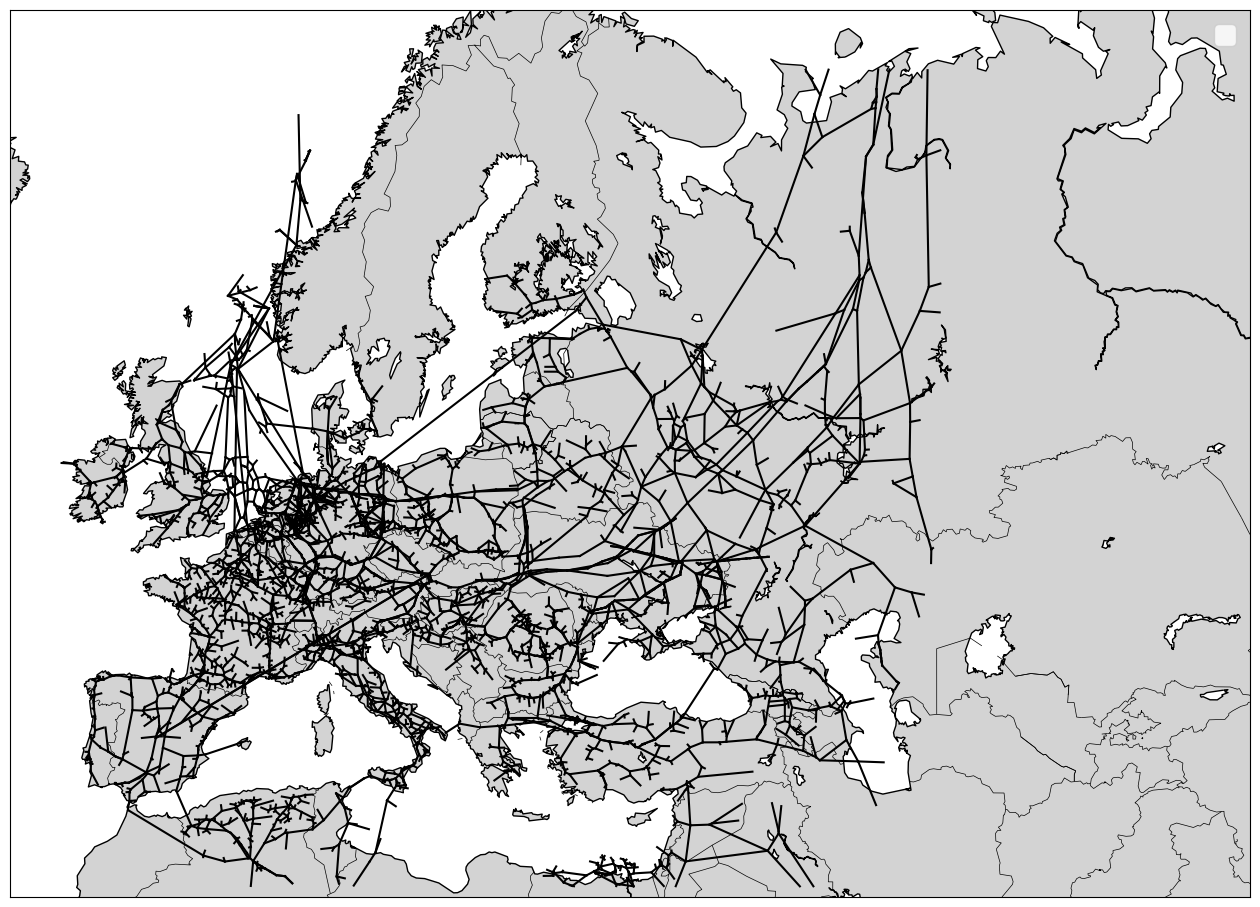

In [71]:
# Plot the graph
fig, ax = plt.subplots(figsize=(16, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the edges
for edge in G_multi_directed.edges():
    node1 = G_multi_directed.nodes[edge[0]]
    node2 = G_multi_directed.nodes[edge[1]]
    x1, y1 = m(node1['long'], node1['lat'])
    x2, y2 = m(node2['long'], node2['lat'])
    m.plot([x1, x2], [y1, y2], 'k-')


# Add legend
plt.legend(loc='upper right', fontsize=20)

plt.show()